<a href="https://colab.research.google.com/github/manoharpavuluri/AI_PlayingwithAgentic/blob/main/playingwithLanggraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def function_1(input_1):
  return input_1 + " First Function "

def function_2(input_2):
  return input_2 + " to Second Function "

In [59]:
!pip uninstall numpy -y
!pip uninstall numpy -y


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4


In [17]:
!pip install langchain --quiet
!pip install langchain_groq --quiet
!pip install langchain-openai --quiet
!pip install langchain-community --quiet
!pip install langgraph --quiet
!pip install langchain-chroma --quiet

!pip install langchain_huggingface --quiet


In [18]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app1 = workflow.compile()

In [10]:
app1.invoke(" I am moving from")

' I am moving from First Function  to Second Function '

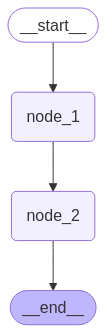

In [11]:
from IPython.display import Image, display

try:
  display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [5]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')

from langchain_groq import ChatGroq
llm = ChatGroq(model = "llama-3.3-70b-versatile")
llm.invoke("hi")

AIMessage(content="It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 36, 'total_tokens': 60, 'completion_time': 0.087272727, 'prompt_time': 0.001660409, 'queue_time': 0.203728639, 'total_time': 0.088933136}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_72a5dc99ee', 'finish_reason': 'stop', 'logprobs': None}, id='run-2cc49615-4a54-4845-bc1b-51ac391a4851-0', usage_metadata={'input_tokens': 36, 'output_tokens': 24, 'total_tokens': 60})

In [17]:
def function_1(input_1):
    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Japan , Sports]. Don't include reasoning. \
        Following is the user query: " + input_1
    response = llm.invoke(complete_query)
    return response.content

def function_2(input_2):
    TOPIC_UPPER = input_2.upper()
    response = f"Here is the topic in UPPER case: {TOPIC_UPPER}"
    return response

In [18]:
workflow2 = Graph()
workflow2.add_node("Agent", function_1)
workflow2.add_node("Tool", function_2)

workflow2.add_edge("Agent", "Tool")

workflow2.set_entry_point("Agent")
workflow2.set_finish_point("Tool")

app2 = workflow2.compile()

In [20]:
query = "tell me about the Japan's industrial growth"
app2.invoke(query)

'Here is the topic in UPPER case: JAPAN'

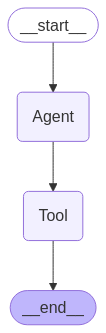

In [25]:
from IPython.display import Image, display

try:
  display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [3]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from git import Repo


In [6]:
repo_url = "https://github.com/manoharpavuluri/AI_PlayingwithAgentic.git"
local_repo_path = "./AI_PlayingwithAgentic"

# Clone only if not already cloned
if not os.path.exists(local_repo_path):
    Repo.clone_from(repo_url, local_repo_path)

loader = DirectoryLoader(
    f"{local_repo_path}/LangGraph",
    glob="*.txt",
    loader_cls=TextLoader
)

docs = loader.load()

In [7]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 10,
    length_function = len
)

new_docs = text_splitter.split_documents(documents = docs)
doc_strings = [doc.page_content for doc in new_docs]


In [62]:
!pip uninstall -y numpy transformers


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: transformers 4.50.3
Uninstalling transformers-4.50.3:
  Successfully uninstalled transformers-4.50.3


In [63]:
!pip install numpy==1.26.4 transformers --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 99.6 MB/s eta 0:00:00


In [1]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}

embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)


<ipython-input-1-6b6bf19416f8>:7: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/777 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
### Creating Retriever using Vector DB

db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 4})

In [11]:
from pprint import pprint

query = "Tell me about llama3?"
docs = retriever.get_relevant_documents(query)
pprint(docs)

[Document(metadata={'source': 'AI_PlayingwithAgentic/LangGraph/llama3.txt'}, page_content='by Meta AI starting in February 2023.[2][3] The latest version is Llama 3 released in April'),
 Document(metadata={'source': 'AI_PlayingwithAgentic/LangGraph/llama3.txt'}, page_content='in select regions, and a standalone website. Both services use a Llama 3 model.[12] Reception was'),
 Document(metadata={'source': 'AI_PlayingwithAgentic/LangGraph/llama3.txt'}, page_content='version of Llama 3 as being "surprisingly capable" given it\'s size.[11]'),
 Document(metadata={'source': 'AI_PlayingwithAgentic/LangGraph/llama3.txt'}, page_content='Alongside the release of Llama 3, Meta added virtual assistant features to Facebook and WhatsApp in')]


In [12]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import RetrievalQA

In [13]:
# assign AgentState as an empty dict
AgentState = {}

# messages key will be assigned as an empty array. We will append new messages as we pass along nodes.
AgentState["messages"] = []

In [14]:
AgentState

{'messages': []}

In [15]:
def function_1(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question

    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Japan , Sports]. Don't include reasoning. Following is the user query: " + question
    response = llm.invoke(complete_query)
    state['messages'].append(response.content) # appending LLM call response to the AgentState
    return state

def function_2(state):
    messages = state['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [20]:
# Define a Langchain graph
workflow3 = Graph()

workflow3.add_node("Agent", function_1)
workflow3.add_node("tool", function_2)

workflow3.add_edge('Agent', 'tool')

workflow3.set_entry_point("Agent")
workflow3.set_finish_point("tool")

app3 = workflow3.compile()

In [21]:
inputs = {"messages": ["Tell me about llama3 model"]}
app3.invoke(inputs)

'The Llama 3 model is a state-of-the-art model developed by Meta AI, released in April 2023. It has been compared to other models such as PaLM and Chinchilla. Meta AI\'s testing shows that Llama 3 70B is capable, and it has been described as "surprisingly capable" given its size. The Llama 3 model is used in various services, including those available in select regions and a standalone website.'

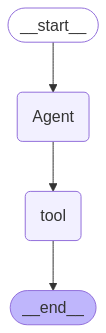

In [22]:
from IPython.display import Image, display

try:
  display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)